<a href="https://colab.research.google.com/github/amanullahquamer/Machine-Learning-1/blob/main/titanicdatasetpreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder

df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
from typing import ValuesView
#step2 understand data structure
# identifies missing Values
# check numerical vs categorical columns
# provides insight into distributions

In [2]:
df.info()
print(df.isnull().sum())

df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
survived         0
pclass           0
sex              0
age            177
sib

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


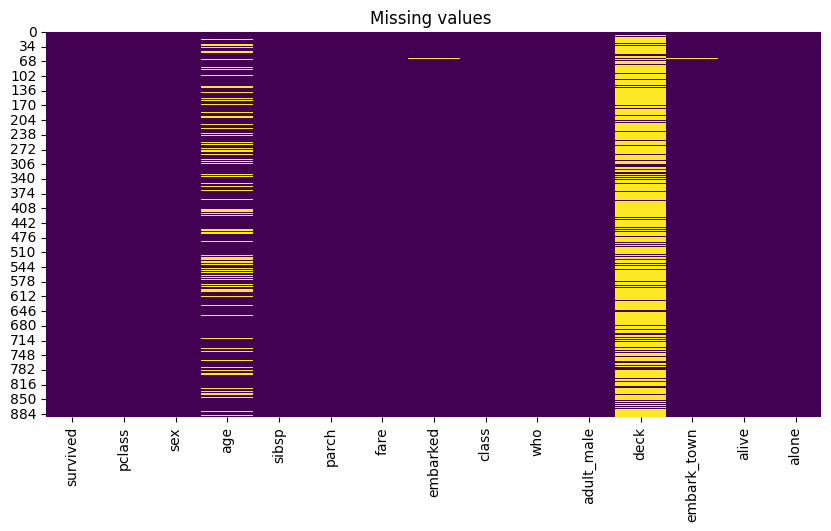

In [3]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")
plt.title("Missing values ")
plt.show()

In [4]:
#step3 handle missing values

df.drop(columns=['deck'],inplace=True)
df['age'].fillna(df['age'].median(),inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
df['alive'].fillna(df['alive'].mode()[0],inplace=True)


<ipython-input-4-b9a555fd5446>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)
<ipython-input-4-b9a555fd5446>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [5]:
print(df.isnull().sum())


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


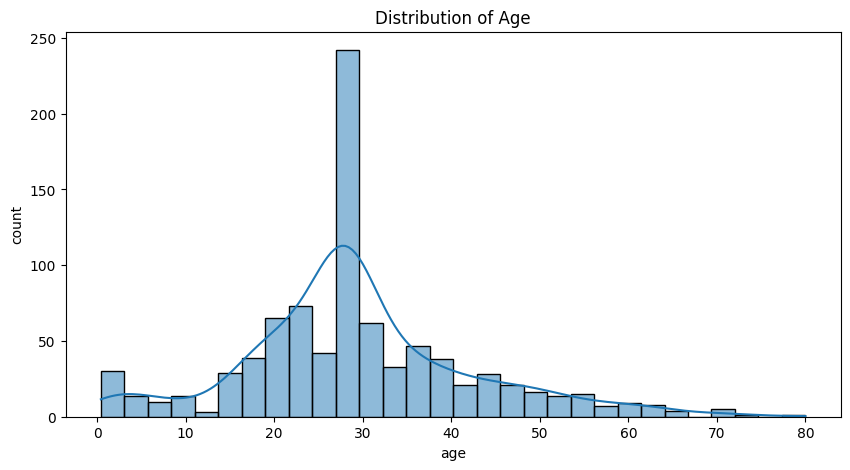

In [6]:
#distr of numerical features
plt.figure(figsize=(10,5))
sns.histplot(df['age'],bins=30,kde=True)
plt.title("Distribution of Age")
plt.xlabel("age")
plt.ylabel("count")
plt.show()

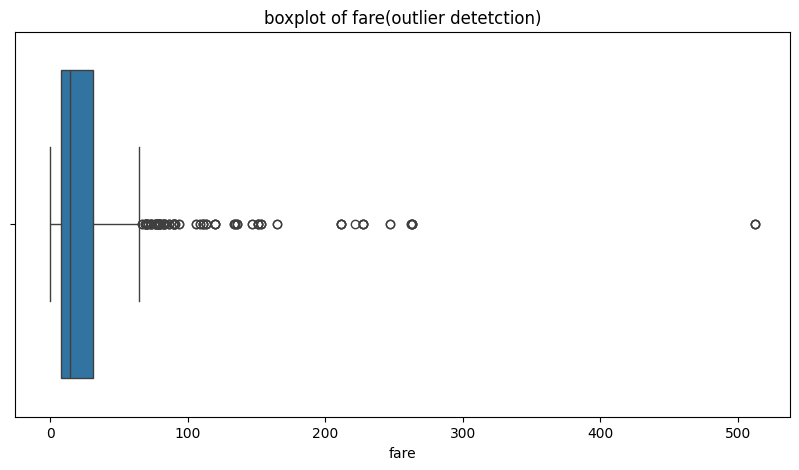

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["fare"])
plt.title("boxplot of fare(outlier detetction)")
plt.show()

<ipython-input-9-d62f05504bcd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="survived",data=df,palette="coolwarm")


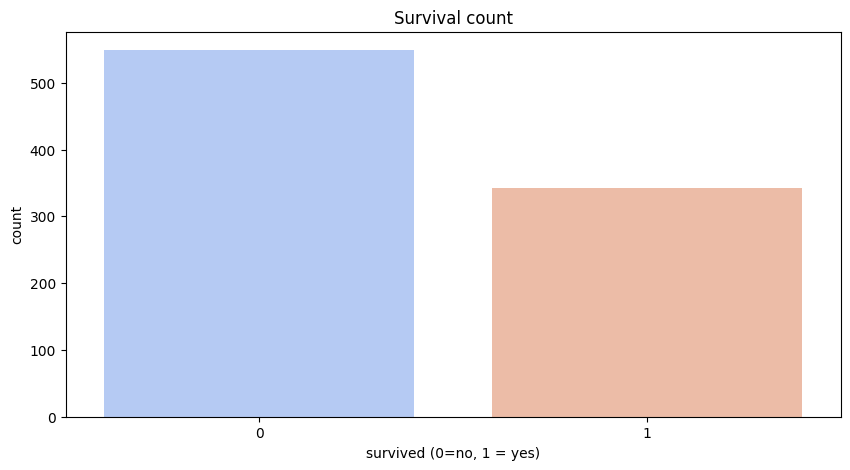

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x="survived",data=df,palette="coolwarm")
plt.title("Survival count")
plt.xlabel("survived (0=no, 1 = yes)")
plt.ylabel("count")
plt.show()

<ipython-input-10-c1683e89d518>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="sex",y="survived",data=df,ci=None,palette="Set2")
<ipython-input-10-c1683e89d518>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sex",y="survived",data=df,ci=None,palette="Set2")


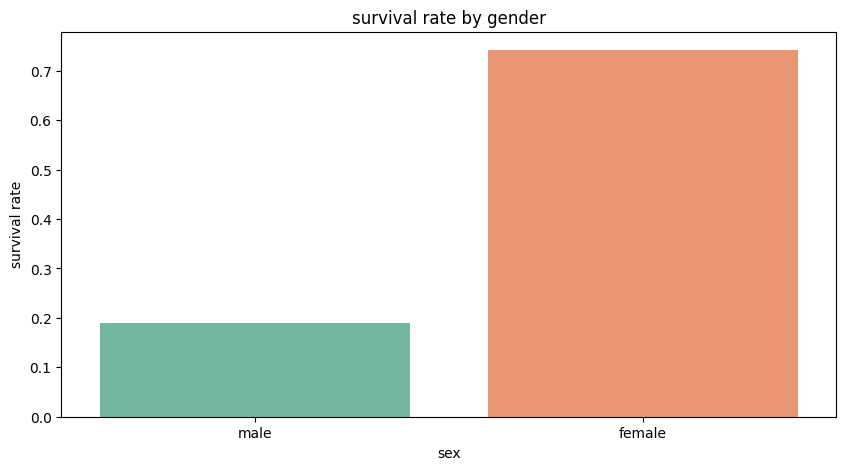

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x="sex",y="survived",data=df,ci=None,palette="Set2")
plt.title("survival rate by gender")
plt.ylabel("survival rate")
plt.show()


<ipython-input-12-19cd5f744c86>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="class",y="survived",data=df,ci=None,palette="Set1")
<ipython-input-12-19cd5f744c86>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="class",y="survived",data=df,ci=None,palette="Set1")


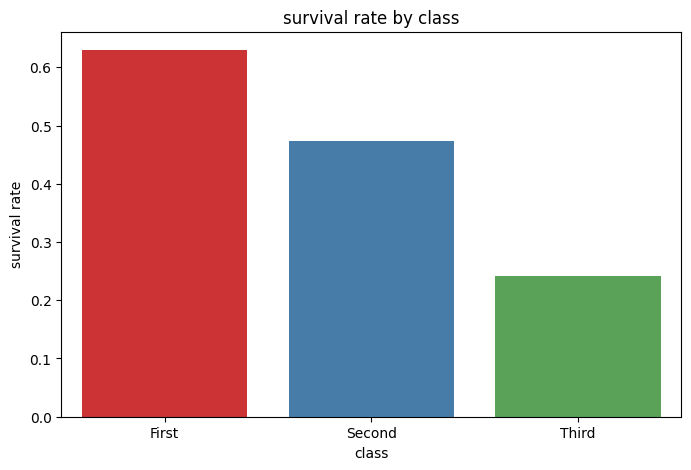

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x="class",y="survived",data=df,ci=None,palette="Set1")
plt.title("survival rate by class")
plt.ylabel("survival rate")
plt.show()

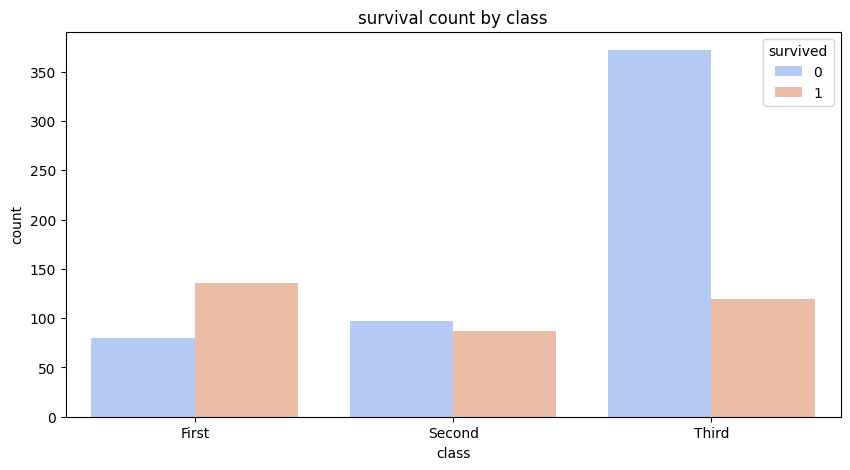

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x="class",hue="survived",data=df,palette="coolwarm")
plt.title("survival count by class")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
print(df.columns)

if 'emabarked' not in df.columns and 'embark_town' in df.columns:
    df.rename(columns={'embark_town':'embarked'},inplace=True)

if 'embarked' in df.columns:
  df=pd.get_dummies(df,columns=['embarked'],drop_first=True)
  print(df.head())

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')
   survived  pclass     sex   age  sibsp  parch     fare  class    who  \
0         0       3    male  22.0      1      0   7.2500  Third    man   
1         1       1  female  38.0      1      0  71.2833  First  woman   
2         1       3  female  26.0      0      0   7.9250  Third  woman   
3         1       1  female  35.0      1      0  53.1000  First  woman   
4         0       3    male  35.0      0      0   8.0500  Third    man   

   adult_male alive  alone  embarked_Q  embarked_S  embarked_Queenstown  \
0        True    no  False       False        True                False   
1       False   yes  False       False       False                False   
2       False   yes   True       False        True                False   
3       False   yes  False       False        True                False   

In [16]:
#step5  feature scaling
num_features=['age','fare']
scaler=StandardScaler()
df[num_features]=scaler.fit_transform(df[num_features])
print(df[num_features].head())

        age      fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


In [17]:
# step6 feature selection

print(df.columns)

drop_cols=['name','ticket','boat','embark_town','parch','sibsp','adult_male','alone']
df.drop(columns=[col for col in drop_cols if col in df.columns])
print(df.head())
print(df.info())


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'who', 'adult_male', 'alive', 'alone', 'embarked_Q', 'embarked_S',
       'embarked_Queenstown', 'embarked_Southampton'],
      dtype='object')
   survived  pclass     sex       age  sibsp  parch      fare  class    who  \
0         0       3    male -0.565736      1      0 -0.502445  Third    man   
1         1       1  female  0.663861      1      0  0.786845  First  woman   
2         1       3  female -0.258337      0      0 -0.488854  Third  woman   
3         1       1  female  0.433312      1      0  0.420730  First  woman   
4         0       3    male  0.433312      0      0 -0.486337  Third    man   

   adult_male alive  alone  embarked_Q  embarked_S  embarked_Queenstown  \
0        True    no  False       False        True                False   
1       False   yes  False       False       False                False   
2       False   yes   True       False        True                False

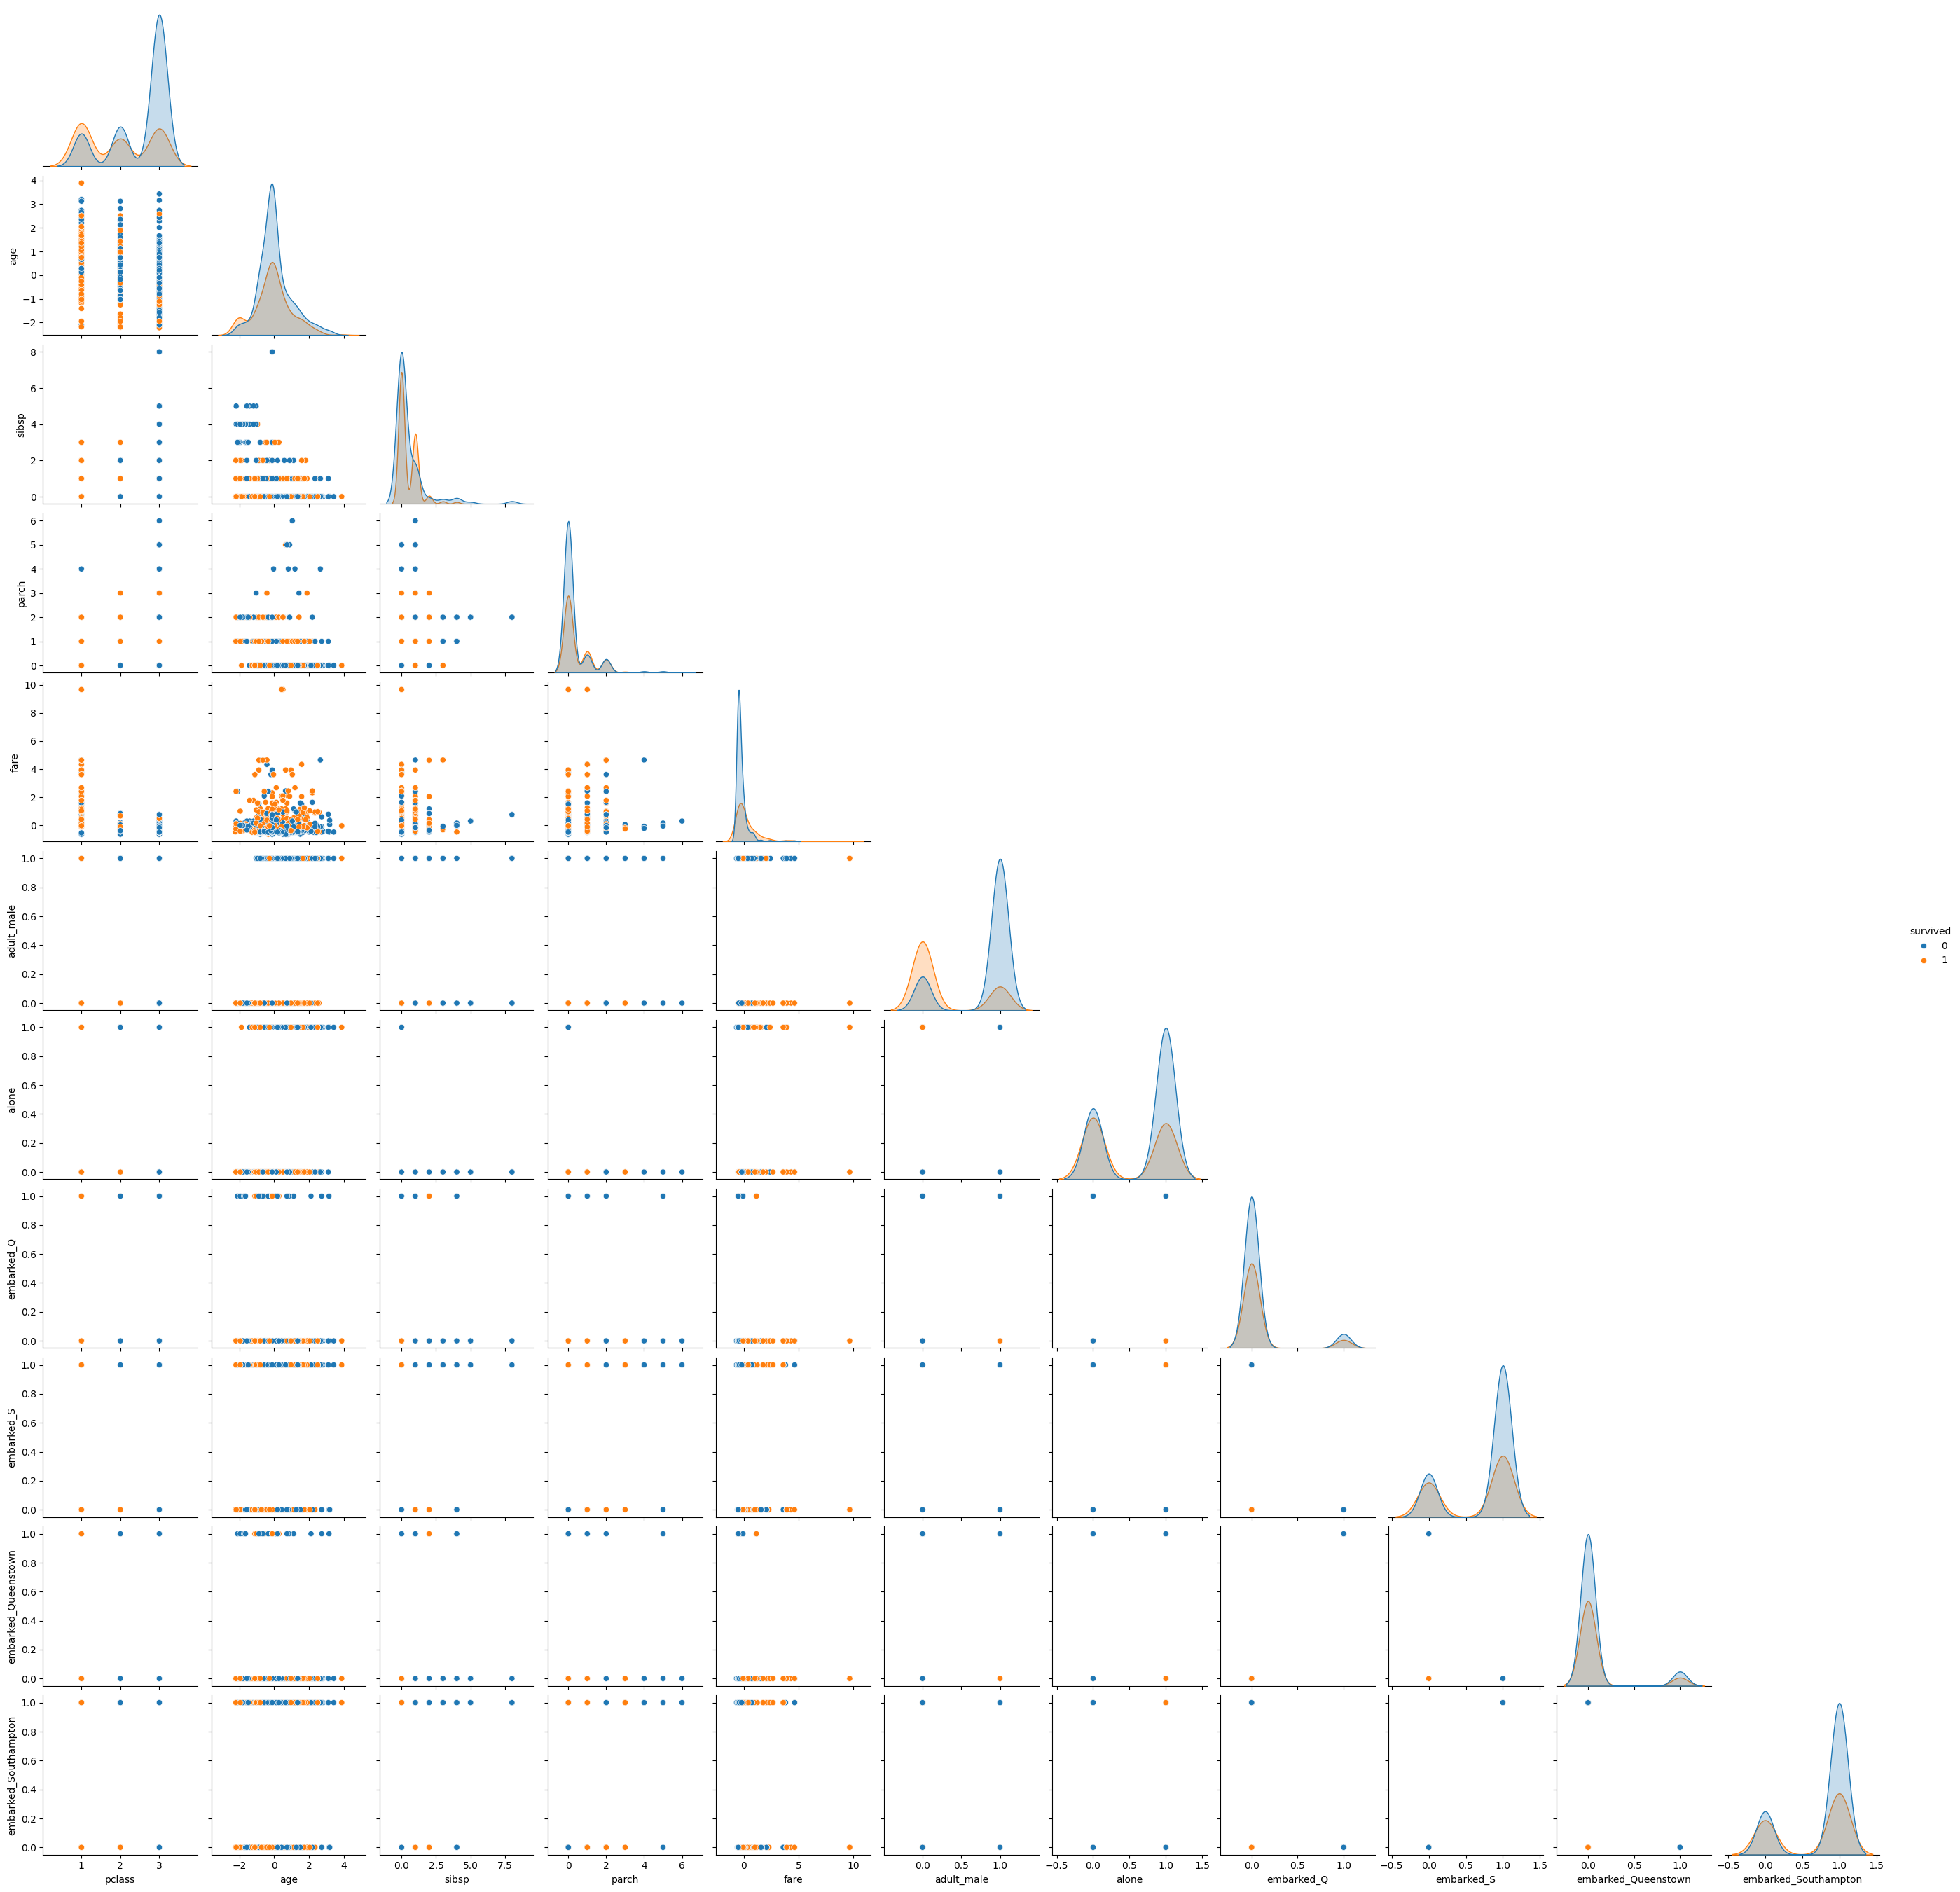

In [18]:
# step9=pairplot
sns.pairplot(df,hue="survived",diag_kind="kde",corner=True)
plt.show()